2090s
==

In [19]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import h5netcdf
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [20]:
file_path_landfrac = r'C:\Users\jaybr\OneDrive\Desktop\UROP\sftlf_fx_CESM2-WACCM_G6sulfur_r1i1p1f2_gn.nc'
landfrac_dataset = xr.open_dataset(file_path_landfrac)
file_path_temp = r'C:\Users\jaybr\OneDrive\Desktop\UROP\tas_Amon_CESM2-WACCM_G6sulfur_r1i1p1f2_gn_207001-210012.nc'
temperature_dataset = xr.open_dataset(file_path_temp)

C:\Users\jaybr\OneDrive\Anaconda\Lib\site-packages\xarray\conventions.py:428: SerializationWarning: variable 'sftlf' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
C:\Users\jaybr\OneDrive\Anaconda\Lib\site-packages\xarray\conventions.py:428: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [21]:
temperature_dataset_masked = temperature_dataset.where(landfrac_dataset['sftlf'] > 50)

In [22]:
start = '2090-01-01'
end = '2099-12-31'

tas = temperature_dataset_masked['tas'].sel(time=slice(start, end))

In [23]:
MAT = tas.mean(dim='time')

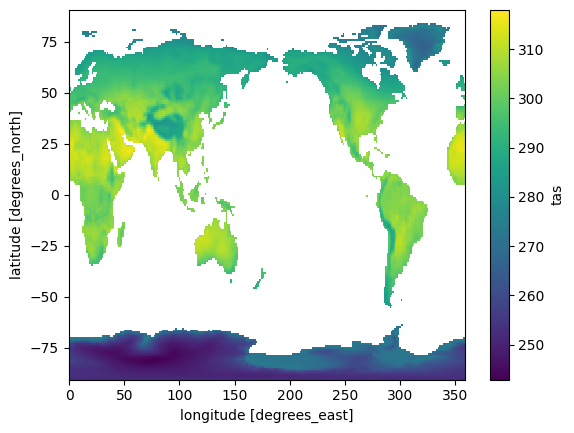

In [24]:
Thot = temperature_dataset_masked['tas'].sel(time=slice(start, end)).groupby("time.month").mean().max(dim='month')
Thot.plot()

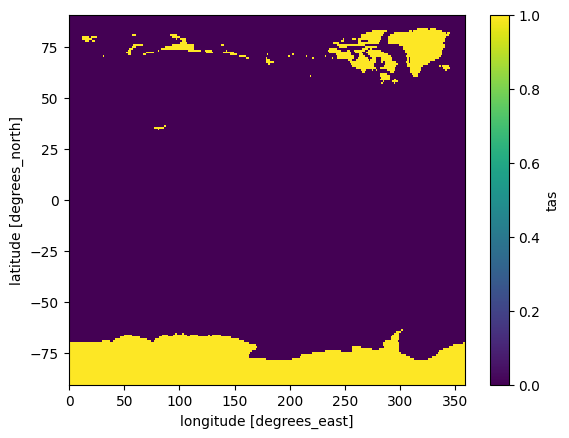

In [25]:
E = xr.where(Thot<(273.15+10), True, False)
E.plot()

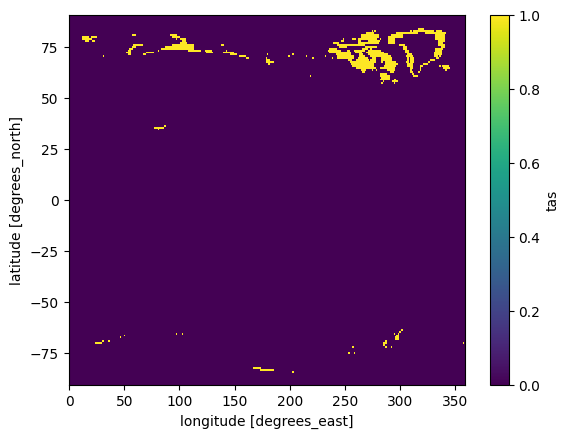

In [26]:
T = xr.where(np.logical_and((Thot<(273.15+10)), (Thot>273.15)), True, False)
T.plot()

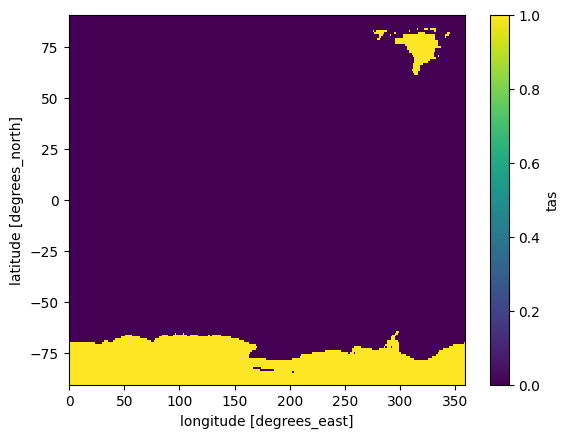

In [27]:
F = xr.where((Thot<=273.15), True, False)
F.plot()

In [28]:
E_set = xr.Dataset()

In [29]:
E_set['lat'] = E.lat
E_set['lon'] = E.lon

In [30]:
E_set['E'] = E
E_set['E'].attrs= {'long_name' : 'polar'}

In [31]:
E_set['ET'] = T
E_set['ET'].attrs= {'long_name' : 'polar tundra'}

In [32]:
E_set['EF'] = F
E_set['EF'].attrs= {'long_name' : 'polar frost'}

In [33]:
E_set

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    E        (lat, lon) bool True True True True ... False False False False
    ET       (lat, lon) bool False False False False ... False False False False
    EF       (lat, lon) bool True True True True ... False False False False

In [34]:
E_set.to_netcdf(path='/Users/jaybr/OneDrive/Desktop/UROP/POLAR_dataset_2090s_G6sulfur.nc', mode='w')